In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import ticker
import h5py
import matplotlib as mpl
mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [18]:
coh2_stw_e = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/coh2/small_basis/coh2_stw_e.dat", dtype=None)
coh2_stw_pe = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/coh2/small_basis/coh2_stw_pe.dat", dtype=None)
coh2_stw_pp = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/coh2/small_basis/coh2_stw_pp.dat", dtype=None)

coh2_smtd_e = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/coh2/small_basis/coh2_smt_e.dat", dtype=None)
coh2_smtd_pe = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/coh2/small_basis/coh2_smt_pe.dat", dtype=None)
coh2_smtd_pp = np.loadtxt("/Users/aodongliu/LiGroup/gaussian/DIIS_benchmark/coh2/small_basis/coh2_smt_pp.dat", dtype=None)

In [19]:
coh2_stw_iter = np.arange(1,coh2_stw_e.size,1)
coh2_stw_iter2 = np.arange(1,coh2_stw_pe.size,1)
coh2_smtd_iter = np.arange(1,coh2_smtd_e.size,1)

In [20]:
# Subtract the final energy for energy at each iteration
coh2_stw_e -= coh2_stw_e[-1]
coh2_smtd_e -= coh2_smtd_e[-1]


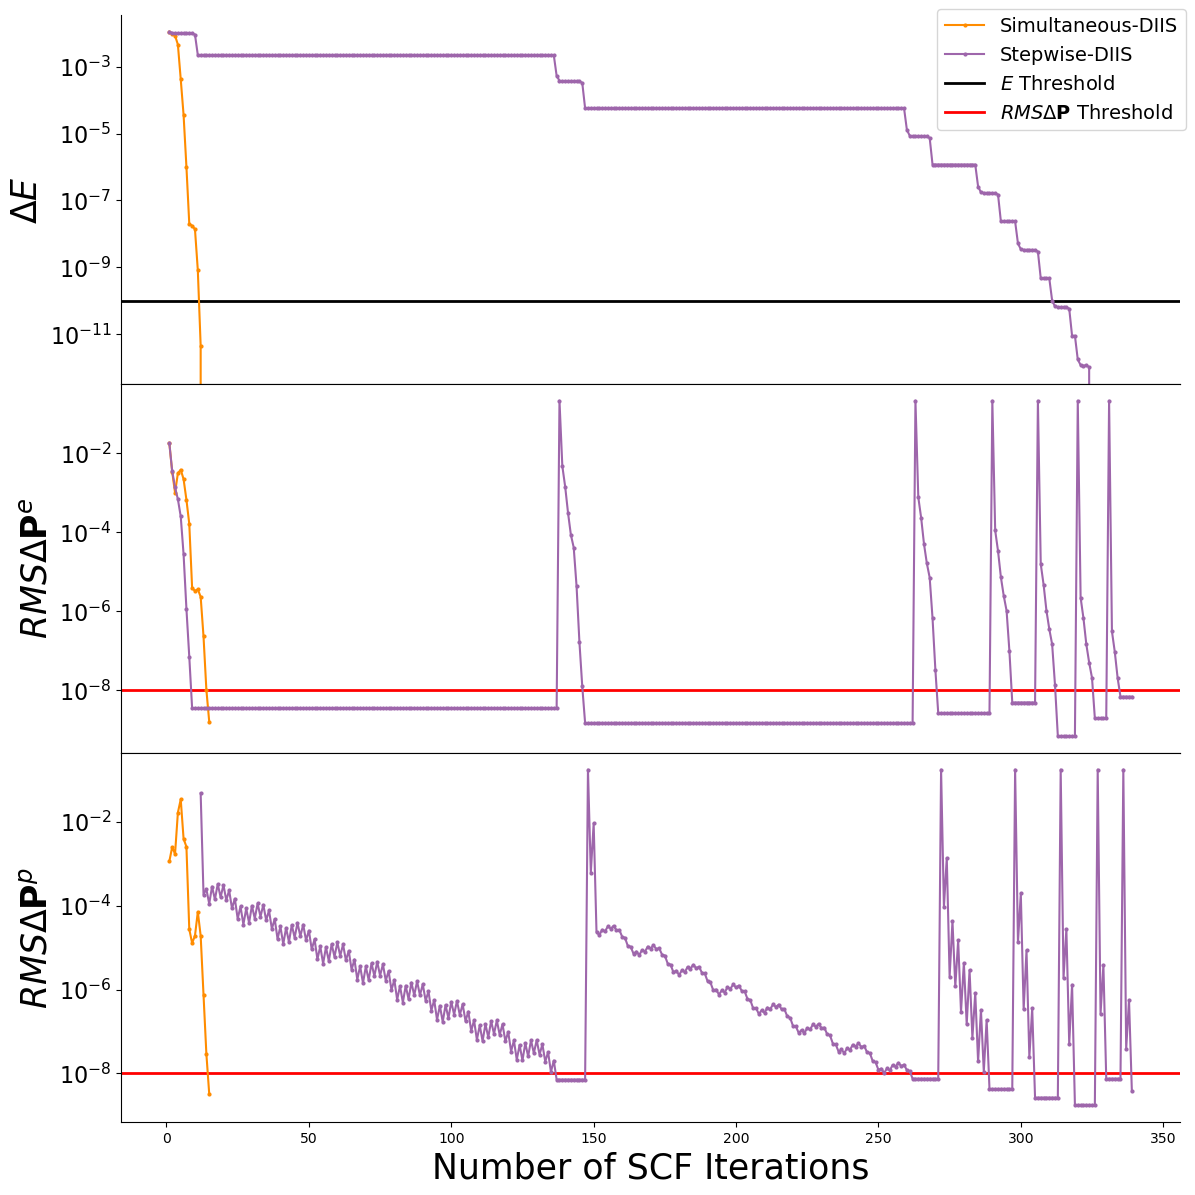

In [38]:
plt.style.use('default')
fig, ax = plt.subplots(3, 1,figsize =(12, 12), sharex=True, sharey='row', gridspec_kw={'hspace': 0},tight_layout=True)
ax[0].plot(coh2_smtd_iter,coh2_smtd_e[1:],'o-',c='darkorange',ms=2,label="Simultaneous-DIIS")
ax[0].plot(coh2_stw_iter,coh2_stw_e[1:],'o-',c='#9e66ab',ms=2,label="Stepwise-DIIS")
ax[0].axhline(y=10**(-10),xmin=0,xmax=coh2_stw_iter.size+1,c="black",linewidth=2,zorder=0,label='$E$ Threshold')
ax[0].set_yscale("log")
ax[0].set_ylabel("$ \Delta E}$",fontsize=25)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[1].plot(coh2_smtd_iter,coh2_smtd_pe[1:],'o-',c='darkorange',ms=2)
ax[1].plot(coh2_stw_iter2,coh2_stw_pe[1:],'o-',c='#9e66ab',ms=2)
ax[1].axhline(y=10**(-8),xmin=0,xmax=coh2_stw_iter.size+1,c="red",linewidth=2,zorder=0,label='$RMS \Delta \mathbf{P} $ Threshold')
ax[1].set_yscale("log")
ax[1].set_ylabel("$RMS \Delta \mathbf{P} ^e$",fontsize=25)
ax[1].spines['right'].set_visible(False)

ax[2].plot(coh2_smtd_iter,coh2_smtd_pp[1:],'o-',c='darkorange',ms=2)
ax[2].plot(coh2_stw_iter2[11:],coh2_stw_pp[12:],'o-',c='#9e66ab',ms=2)
ax[2].axhline(y=10**(-8),xmin=0,xmax=coh2_stw_iter.size+1,c="red",linewidth=2,zorder=0)
ax[2].set_yscale("log")
ax[2].set_ylabel("$RMS \Delta \mathbf{P} ^p$",fontsize=25)
ax[2].set_xlabel("Number of SCF Iterations", fontsize=25)
ax[2].spines['right'].set_visible(False)

ax[0].tick_params(axis='y', labelsize=16)
ax[1].tick_params(axis='y', labelsize=16)
ax[2].tick_params(axis='y', labelsize=16)
# # Hide x labels and tick labels for all but bottom plot.
# for axes in ax:
#    axes.label_outer()

fig.set_facecolor('w')
lines_labels = [axes.get_legend_handles_labels() for axes in ax]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels,fontsize=14,loc='upper right')

plt.tight_layout()
plt.savefig('/Users/aodongliu/LiGroup/gaussian/coh2_2AlgCompvsE.pdf', dpi=3600)


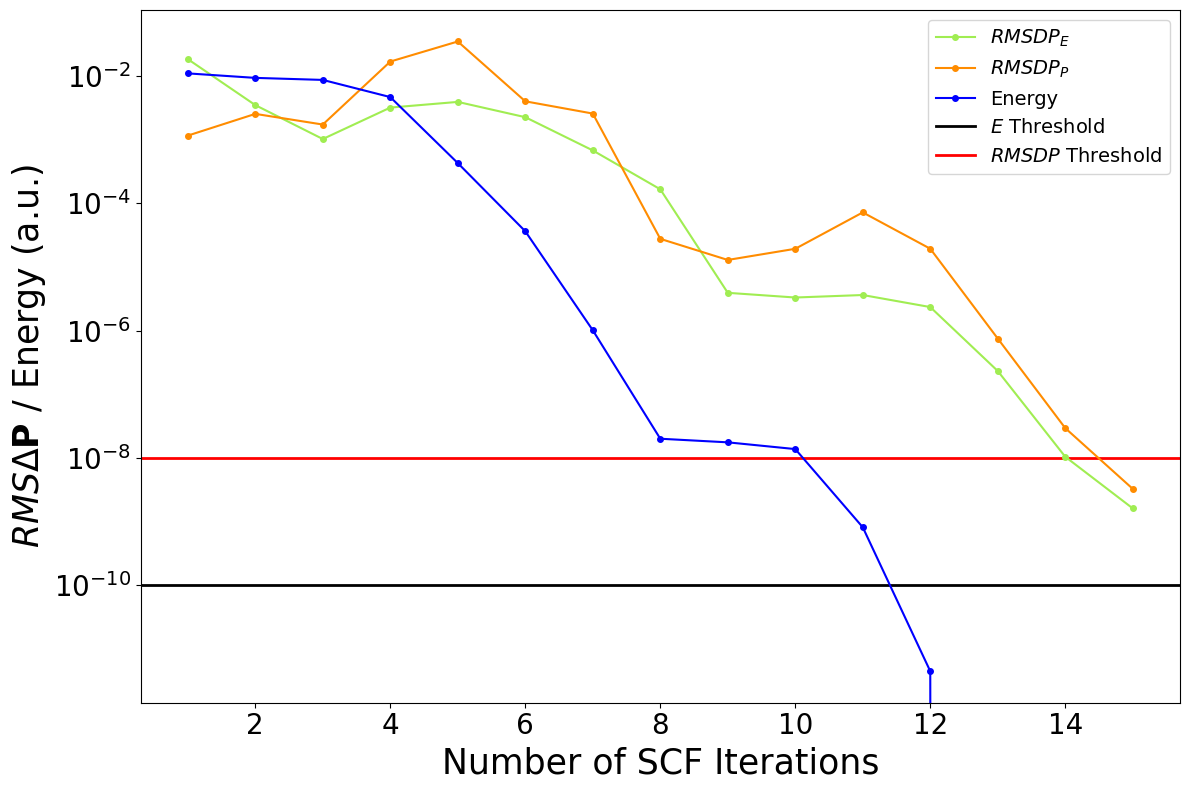

In [39]:
#plt.style.use('classic')
plt.style.use('default')
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(coh2_smtd_iter,coh2_smtd_pe[1:],'o-',color='#A0ED52',ms=4,label="$RMSD P_E$")
plt.plot(coh2_smtd_iter,coh2_smtd_pp[1:],'o-',color='darkorange',ms=4,label="$RMSD P_P$")
plt.plot(coh2_smtd_iter,coh2_smtd_e[1:],'o-',c='blue',ms=4,label="Energy")
plt.axhline(y=10**(-10),xmin=0,xmax=coh2_smtd_iter.size+1,c="black",linewidth=2,zorder=0,label='$E$ Threshold')
plt.axhline(y=10**(-8),xmin=0,xmax=coh2_smtd_iter.size+1,c="red",linewidth=2,zorder=0,label='$RMSDP$ Threshold')
plt.yscale('log')
plt.legend(loc='upper right',fontsize=14)
plt.ylabel("$RMS \Delta \mathbf{P}$ / Energy (a.u.)",fontsize=25)
plt.xlabel("Number of SCF Iterations",fontsize=25)
plt.xticks(size=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('/Users/aodongliu/LiGroup/gaussian/coh2_zoomin.pdf', dpi=3600)
plt.show()